In [3]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

2023-06-27 16:23:09.611630: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
df = pd.read_csv("age_gender.csv")

In [5]:
del df["img_name"]
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

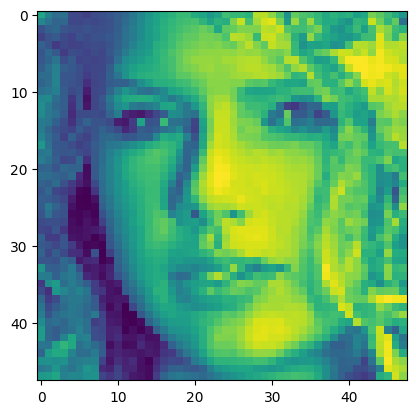

In [6]:
x = np.array(df['pixels'].tolist())
x = x.reshape(x.shape[0],48,48,1)

plt.imshow(x[2000])

In [7]:
x=x/255

In [8]:
y = df['age']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
x_train[0]

array([[[0.2509804 ],
        [0.23529412],
        [0.24313726],
        ...,
        [0.28235295],
        [0.17254902],
        [0.1254902 ]],

       [[0.20392157],
        [0.15294118],
        [0.28627452],
        ...,
        [0.28627452],
        [0.16078432],
        [0.1764706 ]],

       [[0.1882353 ],
        [0.19215687],
        [0.42745098],
        ...,
        [0.25490198],
        [0.2       ],
        [0.2627451 ]],

       ...,

       [[0.50980395],
        [0.46666667],
        [0.3882353 ],
        ...,
        [0.41568628],
        [0.3882353 ],
        [0.41568628]],

       [[0.5137255 ],
        [0.48235294],
        [0.39607844],
        ...,
        [0.39215687],
        [0.43137255],
        [0.38039216]],

       [[0.5372549 ],
        [0.4627451 ],
        [0.36862746],
        ...,
        [0.33333334],
        [0.4392157 ],
        [0.3647059 ]]], dtype=float32)

In [10]:
def plot_figs(epochs,hist):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    values = ["mae","loss"]
    for i in range(2):
        ax[i].plot(range(epochs),hist.history[values[i]],label=values[i])
        ax[i].plot(range(epochs),hist.history['val_'+values[i]],label='val_'+values[i])
        ax[i].set_ylabel(values[i])
        ax[i].set_xlabel("epochs")
        ax[i].set_title(values[i]+" evolution")
        ax[i].legend()
    plt.show()

In [11]:
model_age_1 = tf.keras.Sequential()
model_age_1.add(tf.keras.layers.Flatten(input_shape=(48, 48)))
model_age_1.add(tf.keras.layers.Dense(64,activation="relu"))
model_age_1.add(tf.keras.layers.Dense(64,activation="relu"))
model_age_1.add(tf.keras.layers.Dense(1, activation='relu'))
model_age_1.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [12]:
epochs=20
history_age_1=model_age_1.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test),callbacks=[callback])

Epoch 1/20
593/593 [==============================] - 9s 7ms/step - loss: 392.9187 - mae: 15.1365 - val_loss: 292.8626 - val_mae: 13.1695
Epoch 2/20
593/593 [==============================] - 3s 6ms/step - loss: 276.5158 - mae: 12.6108 - val_loss: 260.2845 - val_mae: 11.9313
Epoch 3/20
593/593 [==============================] - 3s 4ms/step - loss: 243.1261 - mae: 11.6598 - val_loss: 235.6586 - val_mae: 11.3197
Epoch 4/20
593/593 [==============================] - 2s 4ms/step - loss: 222.2108 - mae: 11.0539 - val_loss: 211.7987 - val_mae: 10.8269
Epoch 5/20
593/593 [==============================] - 3s 5ms/step - loss: 208.5797 - mae: 10.6292 - val_loss: 203.1059 - val_mae: 10.5207
Epoch 6/20
593/593 [==============================] - 3s 4ms/step - loss: 202.7413 - mae: 10.4167 - val_loss: 193.5393 - val_mae: 10.1818
Epoch 7/20
593/593 [==============================] - 3s 5ms/step - loss: 192.6891 - mae: 10.1437 - val_loss: 186.3985 - val_mae: 10.0355
Epoch 8/20
593/593 [==============

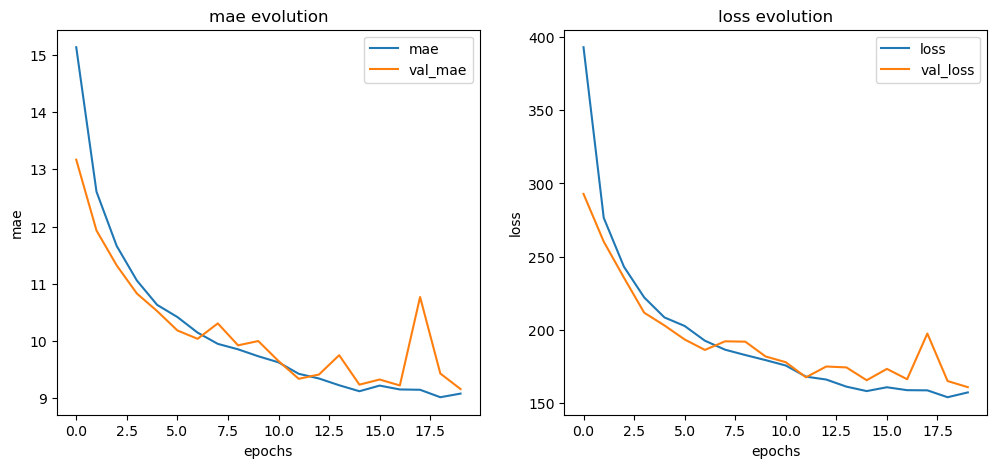

In [13]:
plot_figs(epochs,history_age_1)

In [15]:
model_age_2 = tf.keras.Sequential()
model_age_2.add(tf.keras.layers.Flatten(input_shape=(48, 48)))
model_age_2.add(tf.keras.layers.Dense(128,activation="relu"))
model_age_2.add(tf.keras.layers.Dense(64,activation="relu"))
model_age_2.add(tf.keras.layers.Dense(64,activation="relu"))
model_age_2.add(tf.keras.layers.Dense(1, activation='relu'))
model_age_2.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [16]:
history_age_2=model_age_2.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 5s 5ms/step - loss: 377.5123 - mae: 14.8096 - val_loss: 270.7017 - val_mae: 12.4479
Epoch 2/20
593/593 [==============================] - 3s 4ms/step - loss: 269.2696 - mae: 12.3611 - val_loss: 234.9081 - val_mae: 11.2787
Epoch 3/20
593/593 [==============================] - 3s 6ms/step - loss: 235.7259 - mae: 11.3684 - val_loss: 221.0064 - val_mae: 10.8511
Epoch 4/20
593/593 [==============================] - 3s 5ms/step - loss: 216.6446 - mae: 10.7912 - val_loss: 198.6705 - val_mae: 10.3498
Epoch 5/20
593/593 [==============================] - 3s 5ms/step - loss: 210.7285 - mae: 10.6090 - val_loss: 243.8916 - val_mae: 11.3037
Epoch 6/20
593/593 [==============================] - 3s 5ms/step - loss: 197.3277 - mae: 10.2617 - val_loss: 197.8542 - val_mae: 10.2090
Epoch 7/20
593/593 [==============================] - 3s 4ms/step - loss: 191.5284 - mae: 10.0528 - val_loss: 219.7243 - val_mae: 11.1585
Epoch 8/20
593/593 [==============

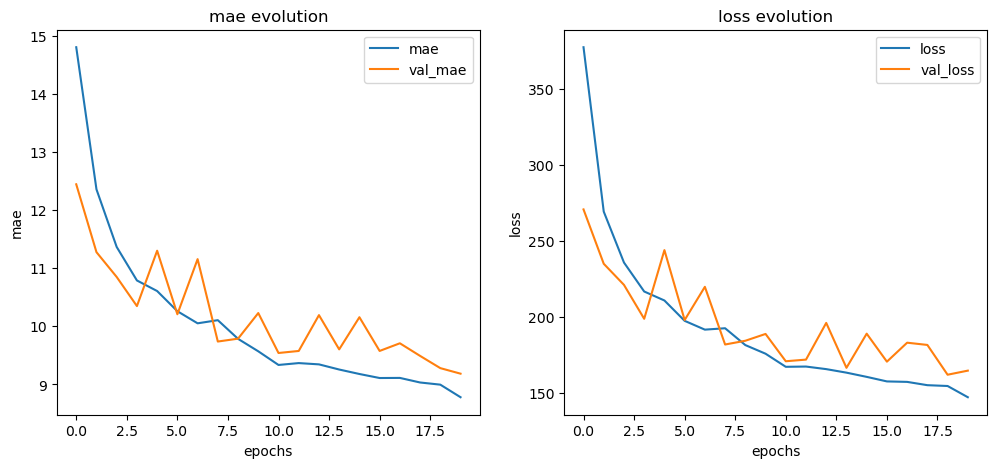

In [19]:
plot_figs(epochs,history_age_2)

In [20]:
model_age_3 = tf.keras.Sequential()
model_age_3.add(tf.keras.layers.Flatten(input_shape=(48, 48)))
model_age_3.add(tf.keras.layers.Dense(512,activation="relu"))
model_age_3.add(tf.keras.layers.Dense(256,activation="relu"))
model_age_3.add(tf.keras.layers.Dense(128,activation="relu"))
model_age_3.add(tf.keras.layers.Dense(64,activation="relu"))
model_age_3.add(tf.keras.layers.Dense(1, activation='relu'))
model_age_3.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [21]:
history_age_3=model_age_3.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 6s 5ms/step - loss: 353.7292 - mae: 14.3311 - val_loss: 248.2609 - val_mae: 11.8640
Epoch 2/20
593/593 [==============================] - 3s 5ms/step - loss: 266.8336 - mae: 12.3573 - val_loss: 284.0043 - val_mae: 13.0717
Epoch 3/20
593/593 [==============================] - 3s 6ms/step - loss: 240.1789 - mae: 11.4854 - val_loss: 203.7074 - val_mae: 10.3271
Epoch 4/20
593/593 [==============================] - 3s 5ms/step - loss: 215.0783 - mae: 10.7441 - val_loss: 270.6227 - val_mae: 12.3782
Epoch 5/20
593/593 [==============================] - 3s 5ms/step - loss: 206.2468 - mae: 10.4581 - val_loss: 195.3208 - val_mae: 10.2290
Epoch 6/20
593/593 [==============================] - 3s 5ms/step - loss: 196.2015 - mae: 10.2011 - val_loss: 237.7908 - val_mae: 10.5920
Epoch 7/20
593/593 [==============================] - 3s 5ms/step - loss: 186.1881 - mae: 9.9032 - val_loss: 183.7758 - val_mae: 10.0381
Epoch 8/20
593/593 [===============

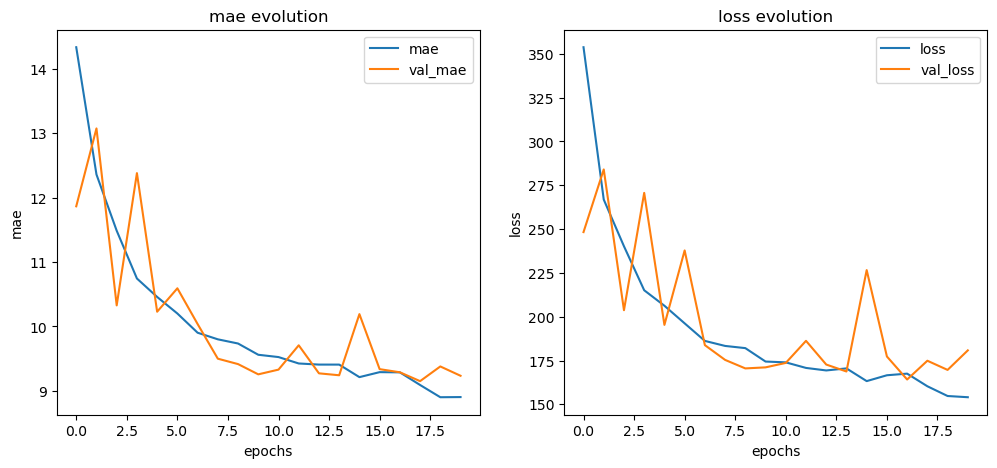

In [24]:
plot_figs(epochs,history_age_3)

In [25]:
model_age_4 = tf.keras.Sequential()
model_age_4.add(tf.keras.layers.Flatten(input_shape=(48, 48)))
model_age_4.add(tf.keras.layers.Dense(512,activation="relu"))
model_age_4.add(tf.keras.layers.Dense(256,activation="relu"))
model_age_4.add(tf.keras.layers.Dense(128,activation="relu"))
model_age_4.add(tf.keras.layers.Dense(64,activation="relu"))
model_age_4.add(tf.keras.layers.Dense(32,activation="relu"))
model_age_4.add(tf.keras.layers.Dropout(0.5))
model_age_4.add(tf.keras.layers.Dense(1, activation='relu'))
model_age_4.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [26]:
epochs = 50
history_age_4=model_age_4.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/50
593/593 [==============================] - 6s 6ms/step - loss: 473.9697 - mae: 16.7291 - val_loss: 282.9537 - val_mae: 12.8213
Epoch 2/50
593/593 [==============================] - 3s 6ms/step - loss: 372.6507 - mae: 14.6417 - val_loss: 285.6451 - val_mae: 12.5009
Epoch 3/50
593/593 [==============================] - 3s 5ms/step - loss: 350.2605 - mae: 14.0694 - val_loss: 265.2975 - val_mae: 12.3491
Epoch 4/50
593/593 [==============================] - 3s 5ms/step - loss: 331.7504 - mae: 13.6704 - val_loss: 210.1593 - val_mae: 10.7576
Epoch 5/50
593/593 [==============================] - 4s 6ms/step - loss: 325.2408 - mae: 13.5284 - val_loss: 214.5136 - val_mae: 11.0298
Epoch 6/50
593/593 [==============================] - 3s 5ms/step - loss: 320.6464 - mae: 13.4318 - val_loss: 250.1567 - val_mae: 11.8325
Epoch 7/50
593/593 [==============================] - 3s 5ms/step - loss: 296.1292 - mae: 12.7066 - val_loss: 237.2912 - val_mae: 10.7044
Epoch 8/50
593/593 [==============

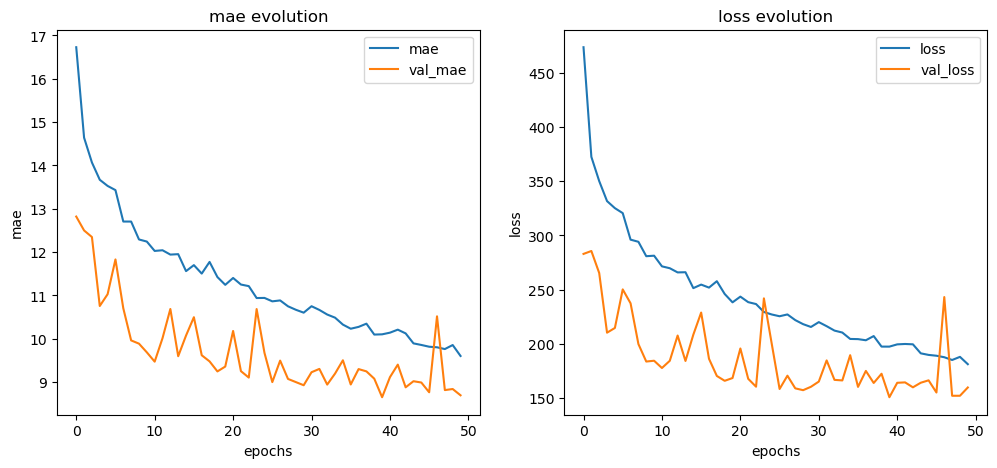

In [27]:
plot_figs(epochs,history_age_4)

In [29]:
model_age_5 = tf.keras.Sequential()
model_age_5.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1))) 
model_age_5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_age_5.add(tf.keras.layers.Flatten())
model_age_5.add(tf.keras.layers.Dense(64, activation='relu'))
model_age_5.add(tf.keras.layers.Dense(1, activation='relu'))  
model_age_5.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [30]:
history_age_5=model_age_5.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/50
593/593 [==============================] - 8s 6ms/step - loss: 291.2109 - mae: 12.9909 - val_loss: 201.4842 - val_mae: 11.1516
Epoch 2/50
593/593 [==============================] - 3s 5ms/step - loss: 187.1799 - mae: 10.4149 - val_loss: 172.2988 - val_mae: 10.2545
Epoch 3/50
593/593 [==============================] - 3s 5ms/step - loss: 161.3959 - mae: 9.5980 - val_loss: 153.5841 - val_mae: 9.2403
Epoch 4/50
593/593 [==============================] - 3s 5ms/step - loss: 144.7232 - mae: 8.9907 - val_loss: 155.3690 - val_mae: 9.6479
Epoch 5/50
593/593 [==============================] - 3s 5ms/step - loss: 135.1796 - mae: 8.6436 - val_loss: 167.4753 - val_mae: 9.2687
Epoch 6/50
593/593 [==============================] - 3s 5ms/step - loss: 123.3299 - mae: 8.1734 - val_loss: 124.4636 - val_mae: 8.1706
Epoch 7/50
593/593 [==============================] - 3s 5ms/step - loss: 114.1471 - mae: 7.8340 - val_loss: 136.1101 - val_mae: 9.0286
Epoch 8/50
593/593 [========================

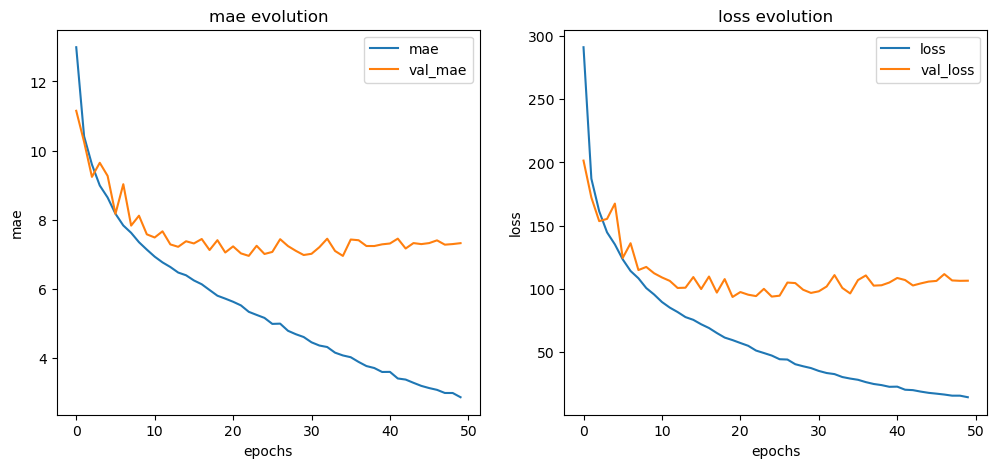

In [31]:
plot_figs(epochs,history_age_5)

In [11]:
model_age_6 = tf.keras.Sequential()
model_age_6.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model_age_6.add(tf.keras.layers.MaxPooling2D((2, 2))) 
model_age_6.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))  
model_age_6.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_age_6.add(tf.keras.layers.Flatten())
model_age_6.add(tf.keras.layers.Dense(128, activation='relu'))
model_age_6.add(tf.keras.layers.Dropout(0.5))
model_age_6.add(tf.keras.layers.Dense(1, activation='relu'))  
model_age_6.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [34]:
history_age_6=model_age_6.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/50
593/593 [==============================] - 6s 6ms/step - loss: 342.5238 - mae: 14.1489 - val_loss: 225.8628 - val_mae: 11.2716
Epoch 2/50
593/593 [==============================] - 3s 5ms/step - loss: 242.2436 - mae: 11.8162 - val_loss: 193.3974 - val_mae: 10.3874
Epoch 3/50
593/593 [==============================] - 3s 5ms/step - loss: 216.0156 - mae: 11.1523 - val_loss: 163.6212 - val_mae: 9.6722
Epoch 4/50
593/593 [==============================] - 3s 6ms/step - loss: 189.3376 - mae: 10.3497 - val_loss: 197.0557 - val_mae: 10.2615
Epoch 5/50
593/593 [==============================] - 3s 5ms/step - loss: 179.6320 - mae: 10.0190 - val_loss: 149.4726 - val_mae: 9.4914
Epoch 6/50
593/593 [==============================] - 3s 6ms/step - loss: 166.6592 - mae: 9.6536 - val_loss: 132.8439 - val_mae: 8.6174
Epoch 7/50
593/593 [==============================] - 3s 5ms/step - loss: 156.9985 - mae: 9.3342 - val_loss: 126.3843 - val_mae: 8.3136
Epoch 8/50
593/593 [====================

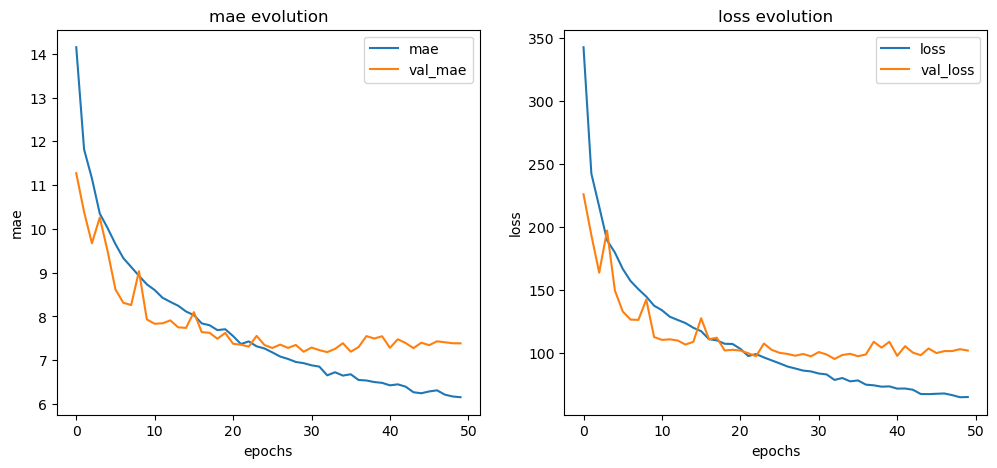

In [35]:
plot_figs(epochs,history_age_6)

In [12]:
model_age_7 = tf.keras.Sequential()
model_age_7.add(tf.keras.layers.Conv2D(30, (5, 5), strides=(1, 1), activation='relu', input_shape=(48, 48, 1)))
model_age_7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
model_age_7.add(tf.keras.layers.Conv2D(15, (3, 3), strides=(1, 1), activation='relu'))  
model_age_7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_age_7.add(tf.keras.layers.Dropout(0.3))
model_age_7.add(tf.keras.layers.Flatten())
model_age_7.add(tf.keras.layers.Dense(128, activation='relu'))
model_age_7.add(tf.keras.layers.Dense(50, activation='relu'))
model_age_7.add(tf.keras.layers.Dense(1, activation='relu'))  
model_age_7.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [14]:
epochs=50
history_age_7=model_age_7.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/50
593/593 [==============================] - 48s 81ms/step - loss: 348.0126 - mae: 14.4058 - val_loss: 255.6362 - val_mae: 12.0457
Epoch 2/50
593/593 [==============================] - 44s 75ms/step - loss: 261.5752 - mae: 12.3579 - val_loss: 223.4185 - val_mae: 11.8412
Epoch 3/50
593/593 [==============================] - 42s 70ms/step - loss: 232.1527 - mae: 11.4970 - val_loss: 187.6166 - val_mae: 10.4268
Epoch 4/50
593/593 [==============================] - 41s 69ms/step - loss: 203.9124 - mae: 10.5705 - val_loss: 162.1621 - val_mae: 9.5406
Epoch 5/50
593/593 [==============================] - 41s 69ms/step - loss: 182.8425 - mae: 9.8803 - val_loss: 144.4574 - val_mae: 8.6408
Epoch 6/50
593/593 [==============================] - 41s 70ms/step - loss: 162.9690 - mae: 9.2902 - val_loss: 161.4852 - val_mae: 9.0358
Epoch 7/50
593/593 [==============================] - 44s 74ms/step - loss: 150.8963 - mae: 8.9212 - val_loss: 126.1759 - val_mae: 8.1824
Epoch 8/50
593/593 [=======

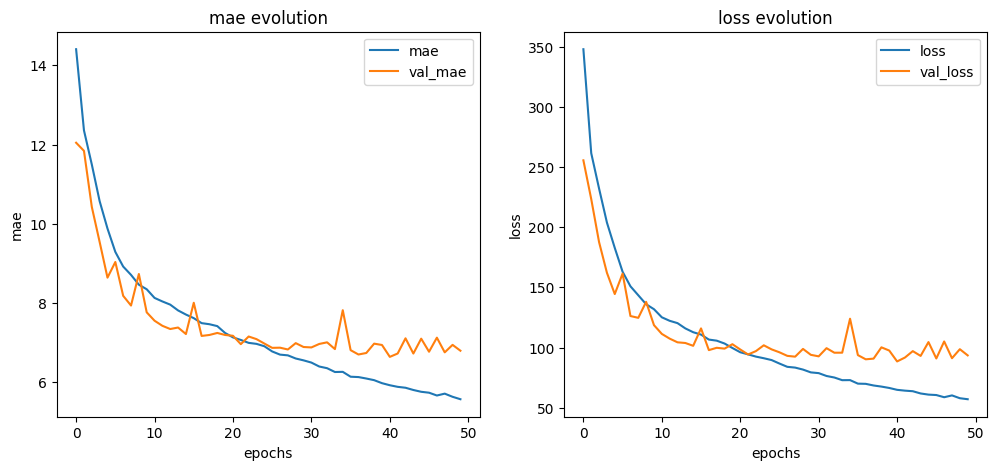

In [20]:
plot_figs(epochs,history_age_7)

In [44]:
model_age_8 = tf.keras.Sequential()
model_age_8.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model_age_8.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_age_8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_age_8.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_age_8.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_age_8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_age_8.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model_age_8.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model_age_8.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model_age_8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_age_8.add(tf.keras.layers.Flatten())
model_age_8.add(tf.keras.layers.Dense(4096, activation='relu'))
model_age_8.add(tf.keras.layers.Dense(2048, activation='relu'))
model_age_8.add(tf.keras.layers.Dense(1, activation='relu'))  
model_age_8.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [45]:
epochs = 20
history_age_8=model_age_8.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 12s 13ms/step - loss: 414.6567 - mae: 15.1514 - val_loss: 258.6130 - val_mae: 13.0432
Epoch 2/20
593/593 [==============================] - 7s 12ms/step - loss: 189.8885 - mae: 10.1787 - val_loss: 152.8269 - val_mae: 8.9948
Epoch 3/20
593/593 [==============================] - 7s 12ms/step - loss: 140.2837 - mae: 8.5962 - val_loss: 134.2362 - val_mae: 8.3151
Epoch 4/20
593/593 [==============================] - 7s 12ms/step - loss: 118.7987 - mae: 7.8700 - val_loss: 108.5453 - val_mae: 7.3936
Epoch 5/20
593/593 [==============================] - 7s 11ms/step - loss: 104.0826 - mae: 7.3466 - val_loss: 104.4224 - val_mae: 7.3028
Epoch 6/20
593/593 [==============================] - 7s 12ms/step - loss: 97.0502 - mae: 7.0877 - val_loss: 112.3636 - val_mae: 7.5449
Epoch 7/20
593/593 [==============================] - 7s 12ms/step - loss: 90.4619 - mae: 6.8467 - val_loss: 109.9095 - val_mae: 7.4094
Epoch 8/20
593/593 [===================

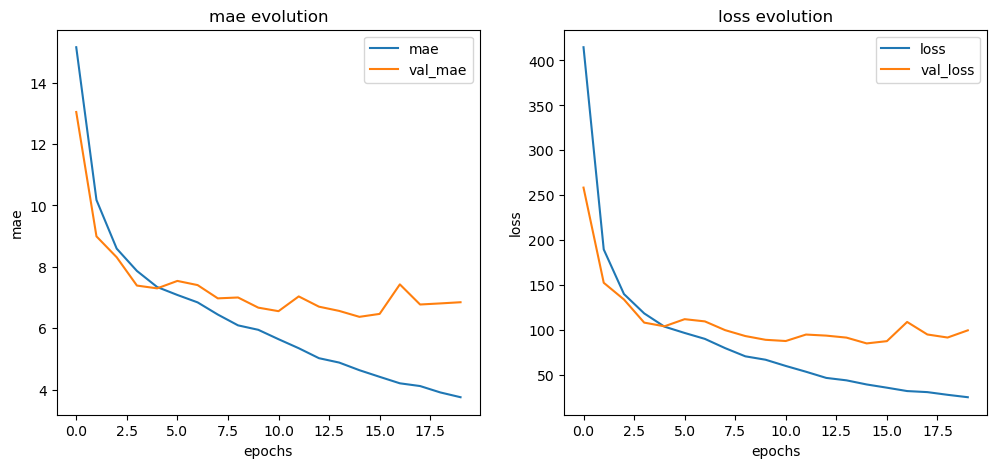

In [46]:
plot_figs(epochs,history_age_8)

In [1]:
from PIL import Image

image_val = Image.open('val.jpg','r')
image_val = image_val.convert('L')
pixels_val = list(image_val.getdata())

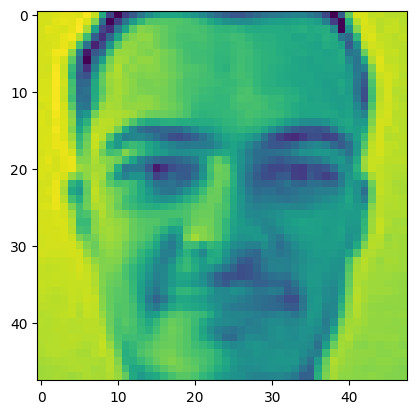

In [15]:
pixels_val = np.array(pixels_val)/255
pixels_val = pixels_val.reshape(1,48,48,1)

plt.imshow(pixels_val[0])

In [16]:
model_age_7.predict(pixels_val)

1/1 [==============================] - 0s 296ms/step


array([[0.28937244]], dtype=float32)

In [17]:
image_test_femme = Image.open('test_femme.png','r')
image_test_femme = image_test_femme.convert('L')
pixels_test_femme = list(image_test_femme.getdata())

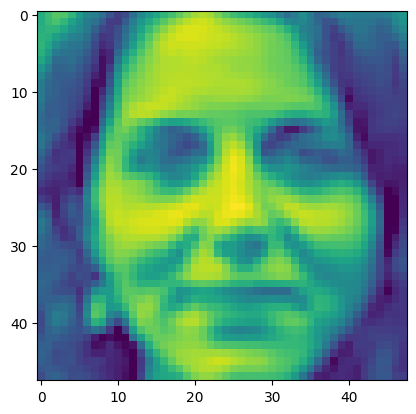

In [18]:
pixels_test_femme = np.array(pixels_test_femme)/255
pixels_test_femme = pixels_test_femme.reshape(1,48,48,1)

plt.imshow(pixels_test_femme[0])

In [19]:
model_age_7.predict(pixels_test_femme)

1/1 [==============================] - 0s 31ms/step


array([[9.549763]], dtype=float32)